# Homework 2

## Task 1 – Dimensionality reduction

####  
Consider a classification problem where you have only two features (the data is on Moodle). You
decided to visualize the instances on a 2D feature space where the class information is color-coded.
The R code to obtain the plot below is already given to you and after running to code you obtained
Figure 3.

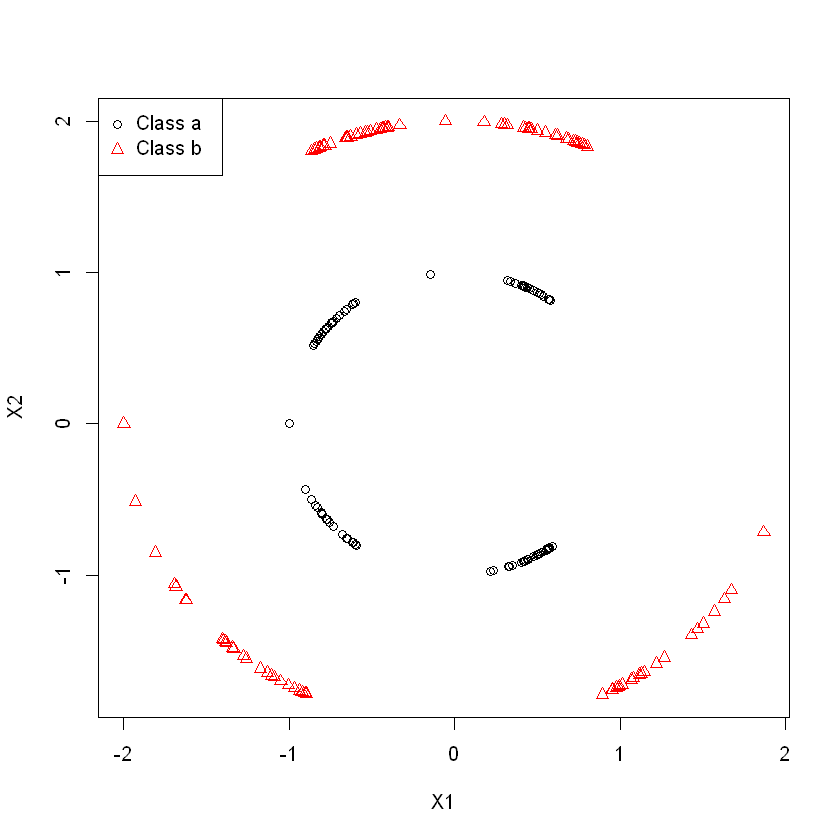

In [11]:
dat=read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
##Scatter Plot of the Features
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))


#### a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. Note that the scatter plot will show the observation number versus the observed value (as we have a single feature to represent the instance).

In [59]:
##Applying Principle Component Analysis
pca = princomp(dat[c(1,2)], cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

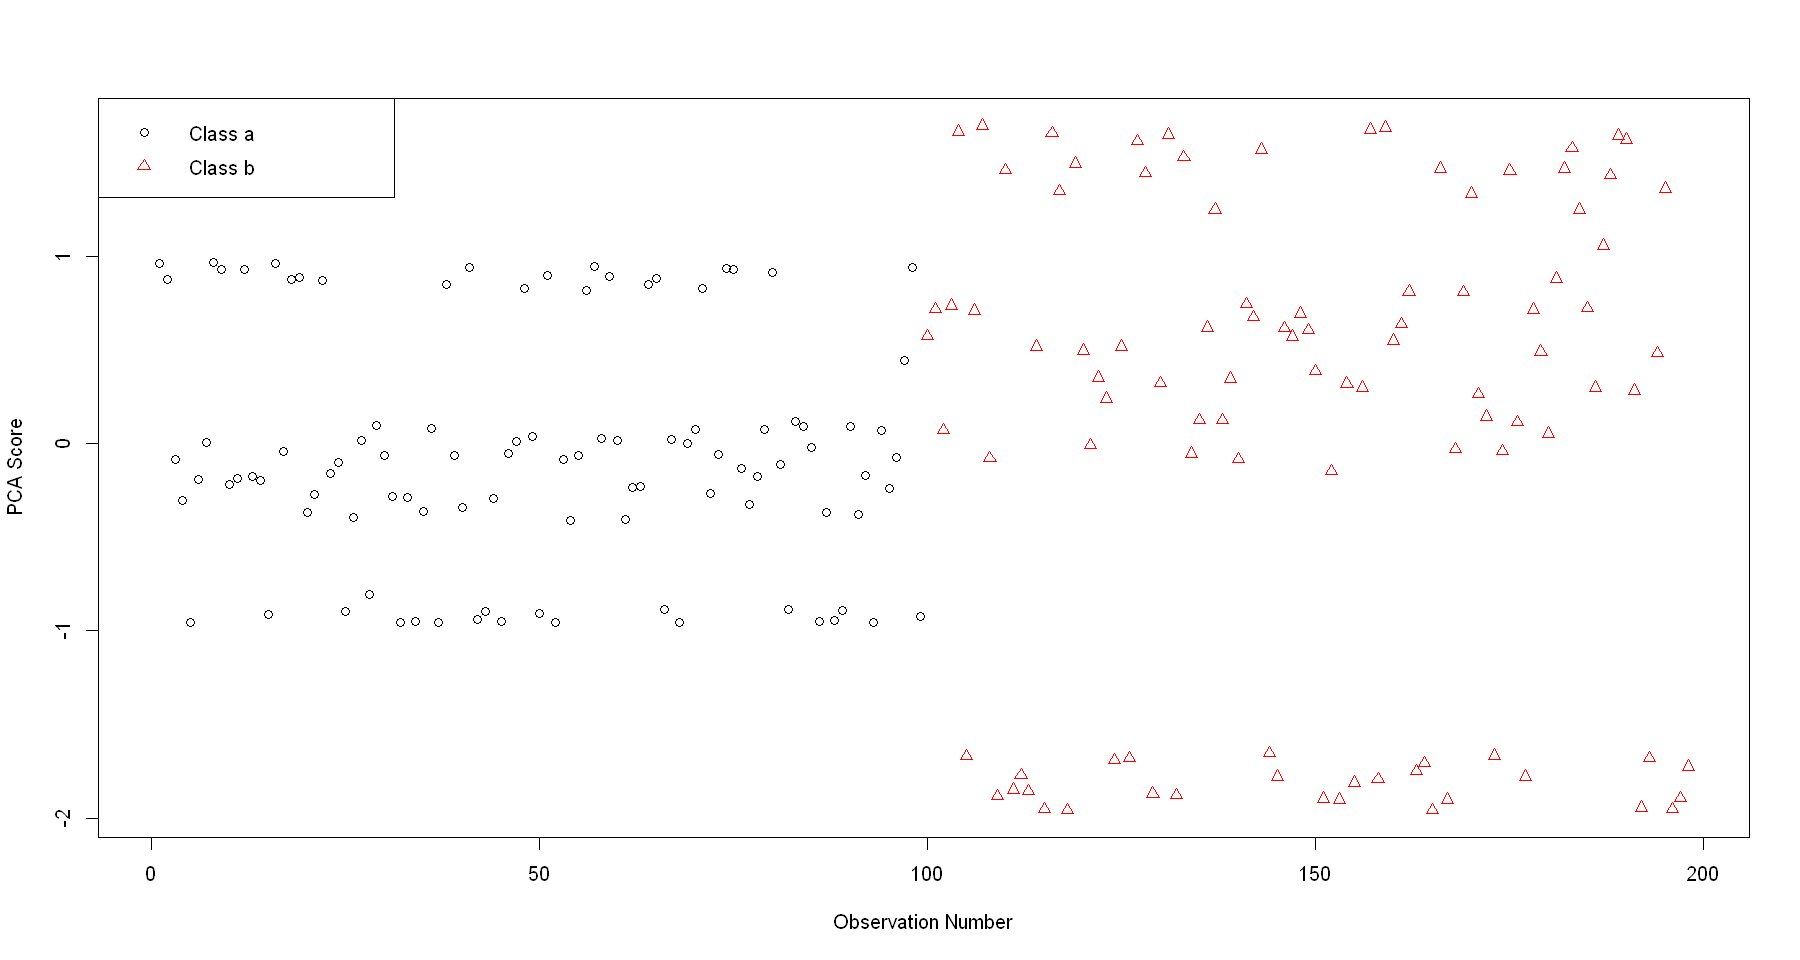

In [65]:
## PCA plot
plot(pca$scores[,1], col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="PCA Score")
legend("topleft", paste("Class",levels(dat[,3])),col=unique(lev),pch=unique(lev))

#### b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part (a). Use at least two different similarity measure. 

Warning message in dist(dat, method = "euclidean"):
"Zorlamadan dolayı ortaya çıkan NAs"

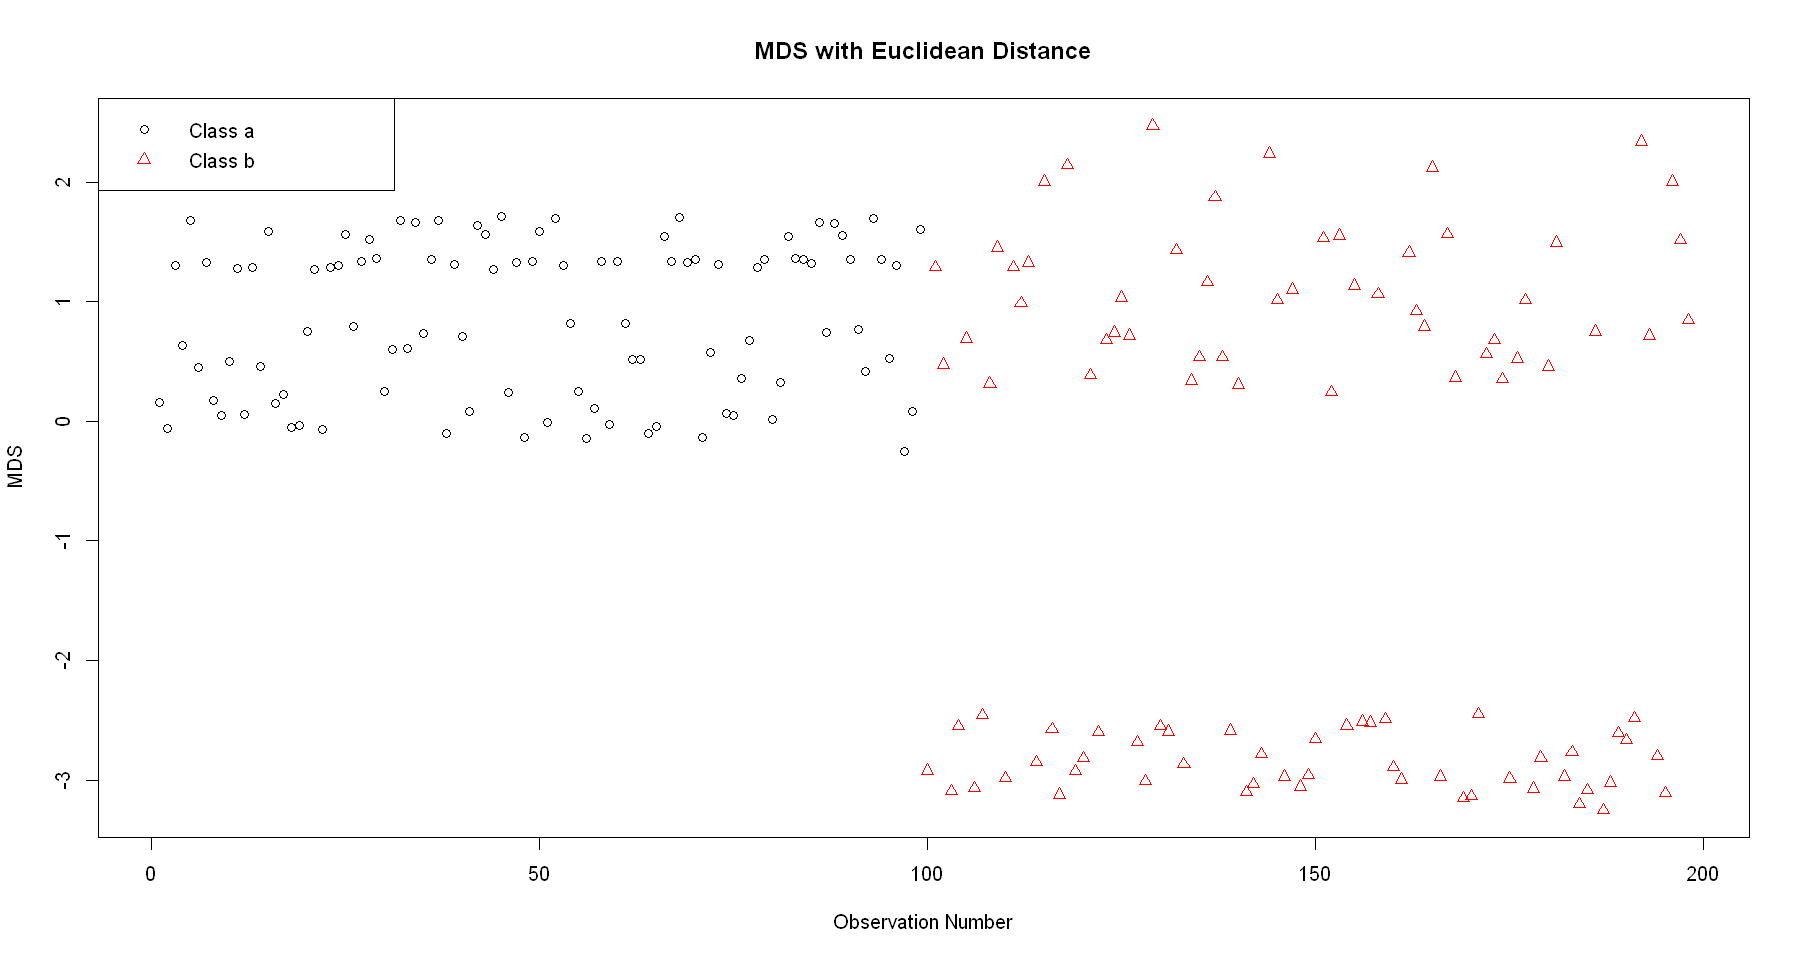

In [66]:
# Distance Matrix with Euclidean Method
d <- dist(dat, method="euclidean")  

# Applying MDS
mds_1 <- cmdscale(d, k=1)
plot(mds_1, col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="MDS", main="MDS with Euclidean Distance")
legend("topleft", paste("Class", levels(dat[,3])), col=unique(lev), pch=unique(lev))

Warning message in dist(dat, method = "manhattan"):
"Zorlamadan dolayı ortaya çıkan NAs"

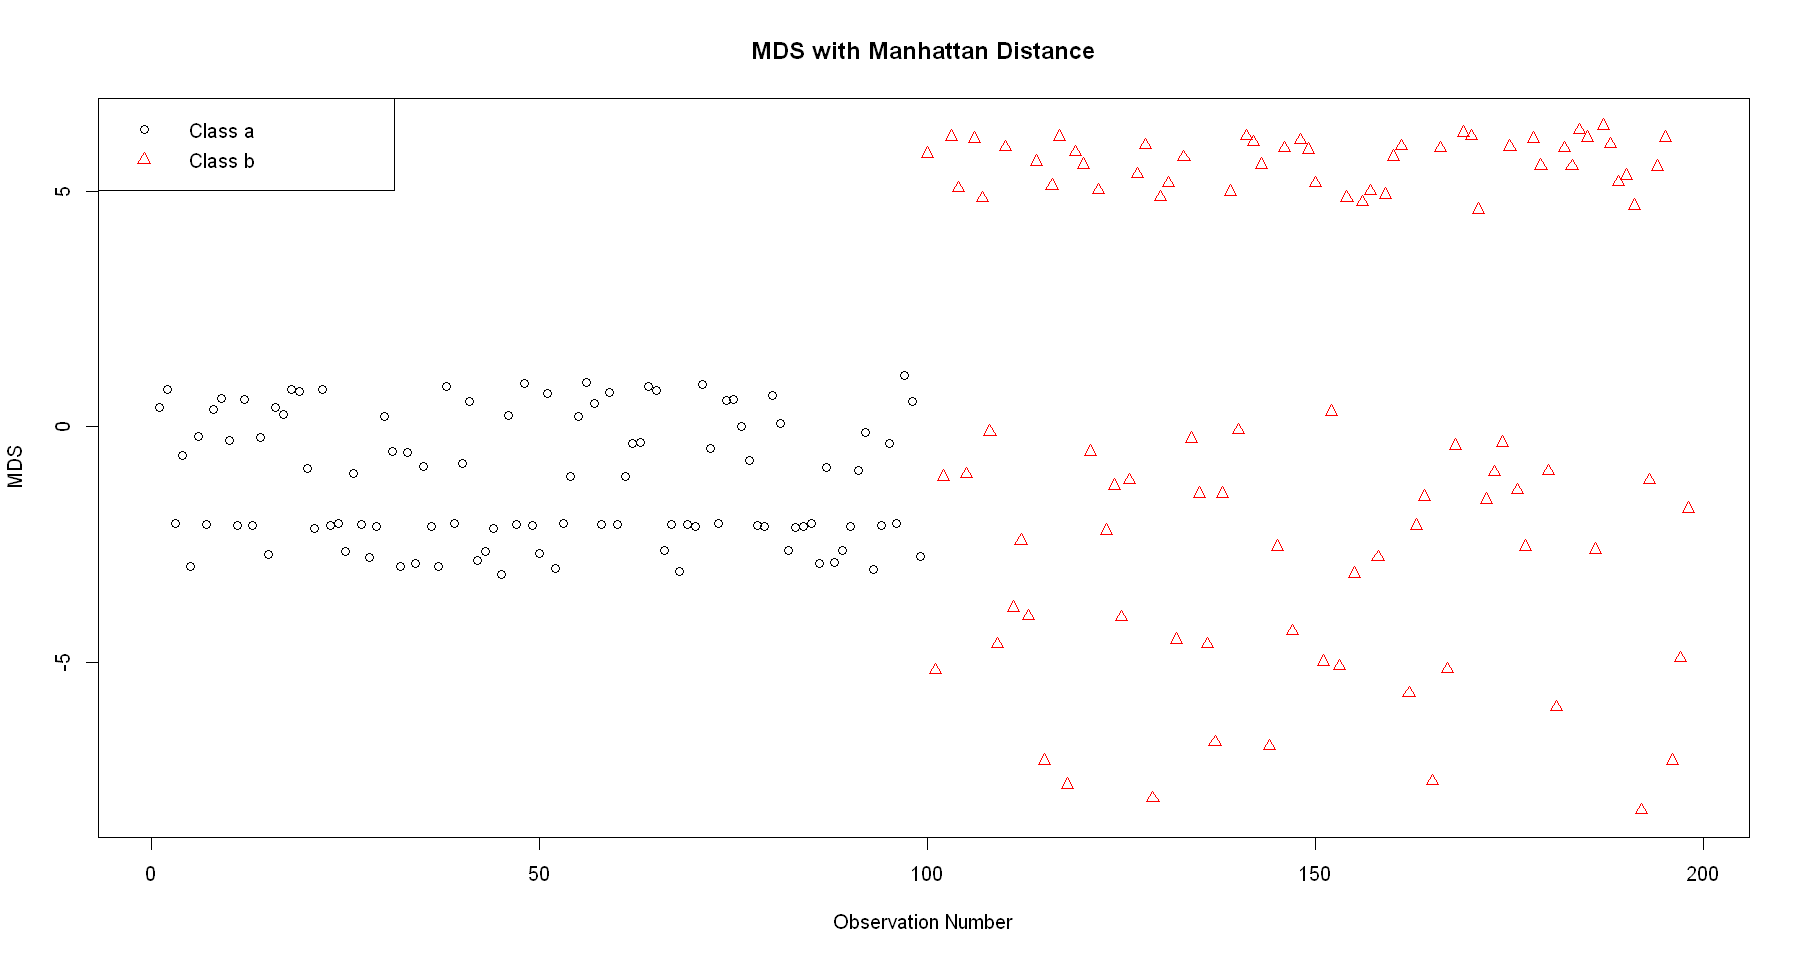

In [68]:
# Distance Matrix with Manhattan Method
d <- dist(dat, method="manhattan")  

# Applying MDS
mds_1 <- cmdscale(d, k=1)
plot(mds_1, col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="MDS", main="MDS with Manhattan Distance")
legend("topleft", paste("Class", levels(dat[,3])), col=unique(lev), pch=unique(lev))

#### c) On a 2D scatter plot, one can observe how two observations from two classes are different. 
1. What is your conclusion when you use PCA results in single dimension (your results from part a)?
1. For the observations in the middle, finding a good seperatiion may be hard. Here, we used PCA for a nonlinear relationship, so it may not be that accurate.

2. What is your conclusion when you use MDS results in single dimension (your results from part b)? Compare the results from different similarity measures used in part (b)
2. Apart from some of the observations, the data is as seperable enough. Feature obtained from both MDSs seems very good. Manhattan distance gave slightly better results because it creates distinctive clusters.

3. Compare MDS results with PCA. What is your conclusion?
3. I think, MDS works better when used in nonlinearity cases, PCA works better when used in linearity cases. Here, PCA did a worse job than MDS at reducing the dimension, because our case is a nonlinear one.


#### d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). 
Add the
following columns to your data, X 1
2
, X2
2
, X 1× X 2 (three columns as functions of your
original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues?
What do they refer to?).


In [69]:
dat$X12 <- dat$X1^2
dat$X22 <- dat$X2^2
dat$X1X2 <- dat$X1*dat$X2

In [70]:
pca = princomp(dat[c(1,2,4,5,6)], cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
X12  -0.539  0.162  0.578 -0.273  0.524
X22   0.351 -0.313  0.797  0.127 -0.356
X1X2 -0.348 -0.600         0.669  0.258

#### Each column refers to eigenvector and each component of eigenvector is corresponding eigenvalue.



## Task 2 – Reconstructing Turkey Map

#### 
Please download the intercity distance information from Karayolları Genel Müdürlüğü’s website from
the link below:
https://www.kgm.gov.tr/SiteCollectionDocuments/KGMdocuments/Root/Uzakliklar/ilmesafe.xls
Suppose we apply MDS to this data to distance matrix to obtain latent variables in 2D dimensional
space. Represent the new feature space on a 2D plot. You are expected to label each data point with the
respective city’s name. This plot should be similar to Turkey map. Are there any unusual observations?
If yes, comment on your findings.

In [39]:
##For reading Excel files
library(readxl)

In [40]:
##Creating the distance Matrix
distance_matrix = as.matrix(read_excel("ilmesafe.xls", skip=2))
distance_matrix = distance_matrix[,-1]
row.names(distance_matrix) = distance_matrix[, 1]
distance_matrix = distance_matrix[, -1]
distance_matrix =`class<-`(distance_matrix, 'numeric')
head(distance_matrix)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,NA,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,NA,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,736,NA,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,492,742,256,1054,333,NA,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


In [41]:
#Because it is a distance matrix, it should be symettric. We can make it symettric with below transformation.
distance_matrix[lower.tri(distance_matrix)] = t(distance_matrix)[lower.tri(distance_matrix)]
head(distance_matrix)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,NA,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,NA,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,738,NA,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,567,814,300,1141,413,NA,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


In [42]:
# Applying MDS
distance_matrix[is.na(distance_matrix)] = 0
d <- cmdscale(distance_matrix, eig = TRUE, k = 2)

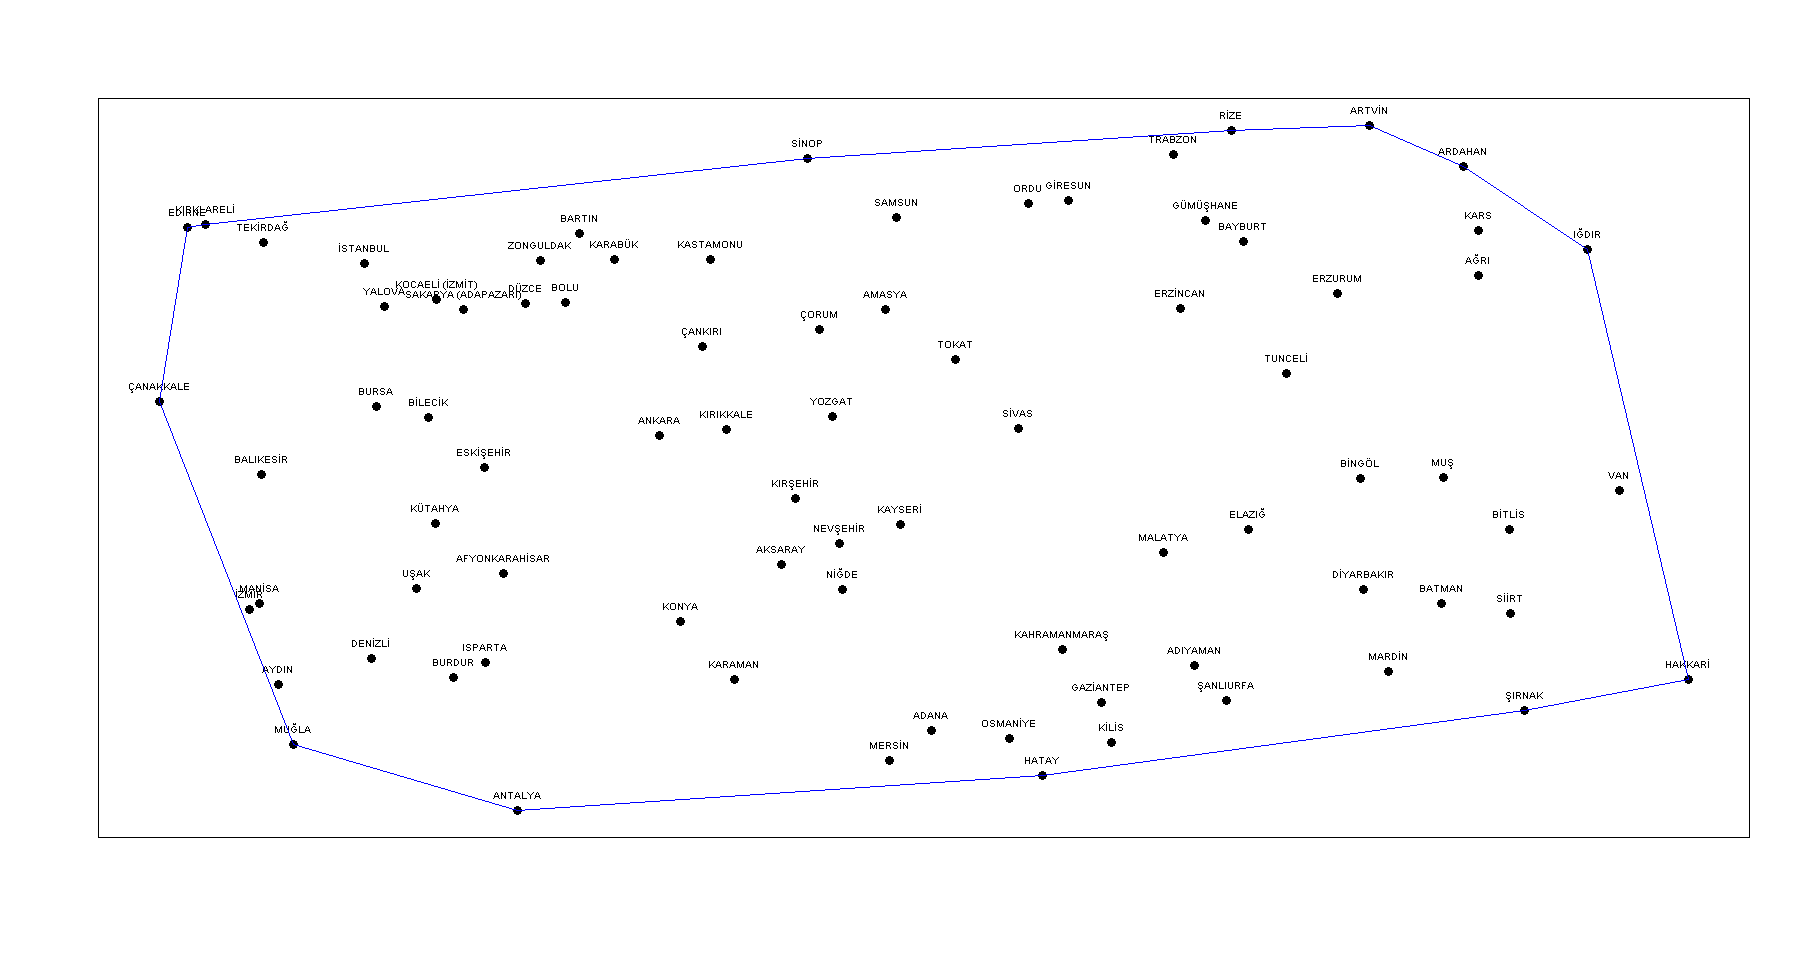

In [43]:
Plot_ConvexHull<-function(xcoord, ycoord, lcolor){
hpts = chull(x = xcoord, y = ycoord)
hpts = c(hpts, hpts[1])
lines(xcoord[hpts], ycoord[hpts], col = lcolor)
}

xrange = range(c(d$points[, 1]))
yrange = range(c(d$points[, 2]))

par(tck = 0.02, mgp = c(1.7, 0.3, 0))

# draw locations
plot(d$points[, 1], d$points[, 2], type = "p", pch = 19, col = "black", xaxt = "n", yaxt = "n", xlab = "", ylab = "", xlim = c(xrange), ylim = c(yrange))
city.names = colnames(distance_matrix)
text(x=d$points[, 1], y=d$points[, 2], pos = 3, labels = city.names, cex=0.5)

# draw borders
Plot_ConvexHull(xcoord = d$points[, 1], ycoord = d$points[, 2], lcolor = "blue")

## Task 3 – Dimensionality reduction for time series data

#### The dataset is provided in the following link:
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm
Note that there are separate files for each axis and each row corresponds to one gesture in the files.
First column has the class information. The information between second and last column is the time
ordered observations in the corresponding axis (provided in the file name as X, Y or Z). Moreover, the
data is split into training and test sets. For now, you are expected to work with only the training series.
Hence, following files are to be used:

• uWaveGestureLibrary_X_TRAIN,

• uWaveGestureLibrary_Y_TRAIN,

• uWaveGestureLibrary_Z_TRAIN


In [82]:
library(data.table)


current_folder = getwd()

file_names = list.files(pattern = "uWaveGestureLibrary")
list_files = lapply(file_names, read.table)

list_files = lapply(seq_along(list_files), function(x) {
  list_files[[x]]$V0 = 1:nrow(list_files[[x]]) # column VO is created to specify the sample instance
  list_files[[x]]
})

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 2 did not have 2 elements


In [83]:
x = as.data.table(list_files[1])
y = as.data.table(list_files[2])
z = as.data.table(list_files[3])

    
# Melting X coordinates 
setnames(x,"V1","class")
setnames(x,"V0","instance")
x = melt(x,id.vars=c('class','instance'))
x[,time:=as.numeric(gsub("\\D", "", variable))-1]
x = x[,list(class,instance, time, value)]
x = x[order(instance, class,time)]
setnames(x, "value", "x_cordinate")


# Melting Y coordinates
setnames(y,"V1","class")
setnames(y,"V0","instance")
y = melt(y,id.vars=c('class','instance'))
y[,time:=as.numeric(gsub("\\D", "", variable))-1]
y = y[,list(class,instance, time, value)]
y = y[order(instance, class, time)]
setnames(y, "value", "y_cordinate")

# Melting Z coordinates
setnames(z,"V1","class")
setnames(z,"V0","instance")
z = melt(z,id.vars=c('class','instance'))
z[,time:=as.numeric(gsub("\\D", "", variable))-1]
z = z[,list(class, instance, time, value)]
z = z[order(instance, class, time)]
setnames(z, "value", "z_cordinate")


xy = merge(x,
            y,
            by=c("class","instance","time"))
            

xyz = merge(xy,
            z,
            by=c("class","instance","time"))

In [84]:
head(xyz)

class,instance,time,x_cordinate,y_cordinate,z_cordinate
1,11,1,-0.7914472,-1.959984,-0.2490781
1,11,2,-0.7914472,-1.959984,-0.2490781
1,11,3,-0.7958727,-1.956600,-0.2514390
1,11,4,-0.8100650,-1.945750,-0.2590101
1,11,5,-0.8492300,-1.915809,-0.2799033
1,11,6,-0.9034648,-1.874347,-0.3088358


####  
a) Read the data and visualize one instance (all axes) from each class and try to relate the shape (time
series) you see with the gestures shown in Figure 1 (this is just for fun, sometimes it is good to start
with data visualization to understand what is going on). A 3D scatter plot would be interesting. Note
that this is an acceleration information. You can transform this information to a velocity vector by
computing the cumulative sum of acceleration over time. A cumulative sum operation on the velocity
values will transform the series to a position information.


In [86]:
library(lattice)

In [87]:
# instances for classes 1, 2, 3, 4, 5, 6, 7, 8 
samples <- xyz[instance %in% c(11, 15, 4, 5, 2, 1, 7, 6),]

In [88]:
velocity_samples = samples[, list(x_cordinate=cumsum(x_cordinate),
                                  y_cordinate=cumsum(y_cordinate),
                                  z_cordinate=cumsum(z_cordinate)), list(class, instance)]

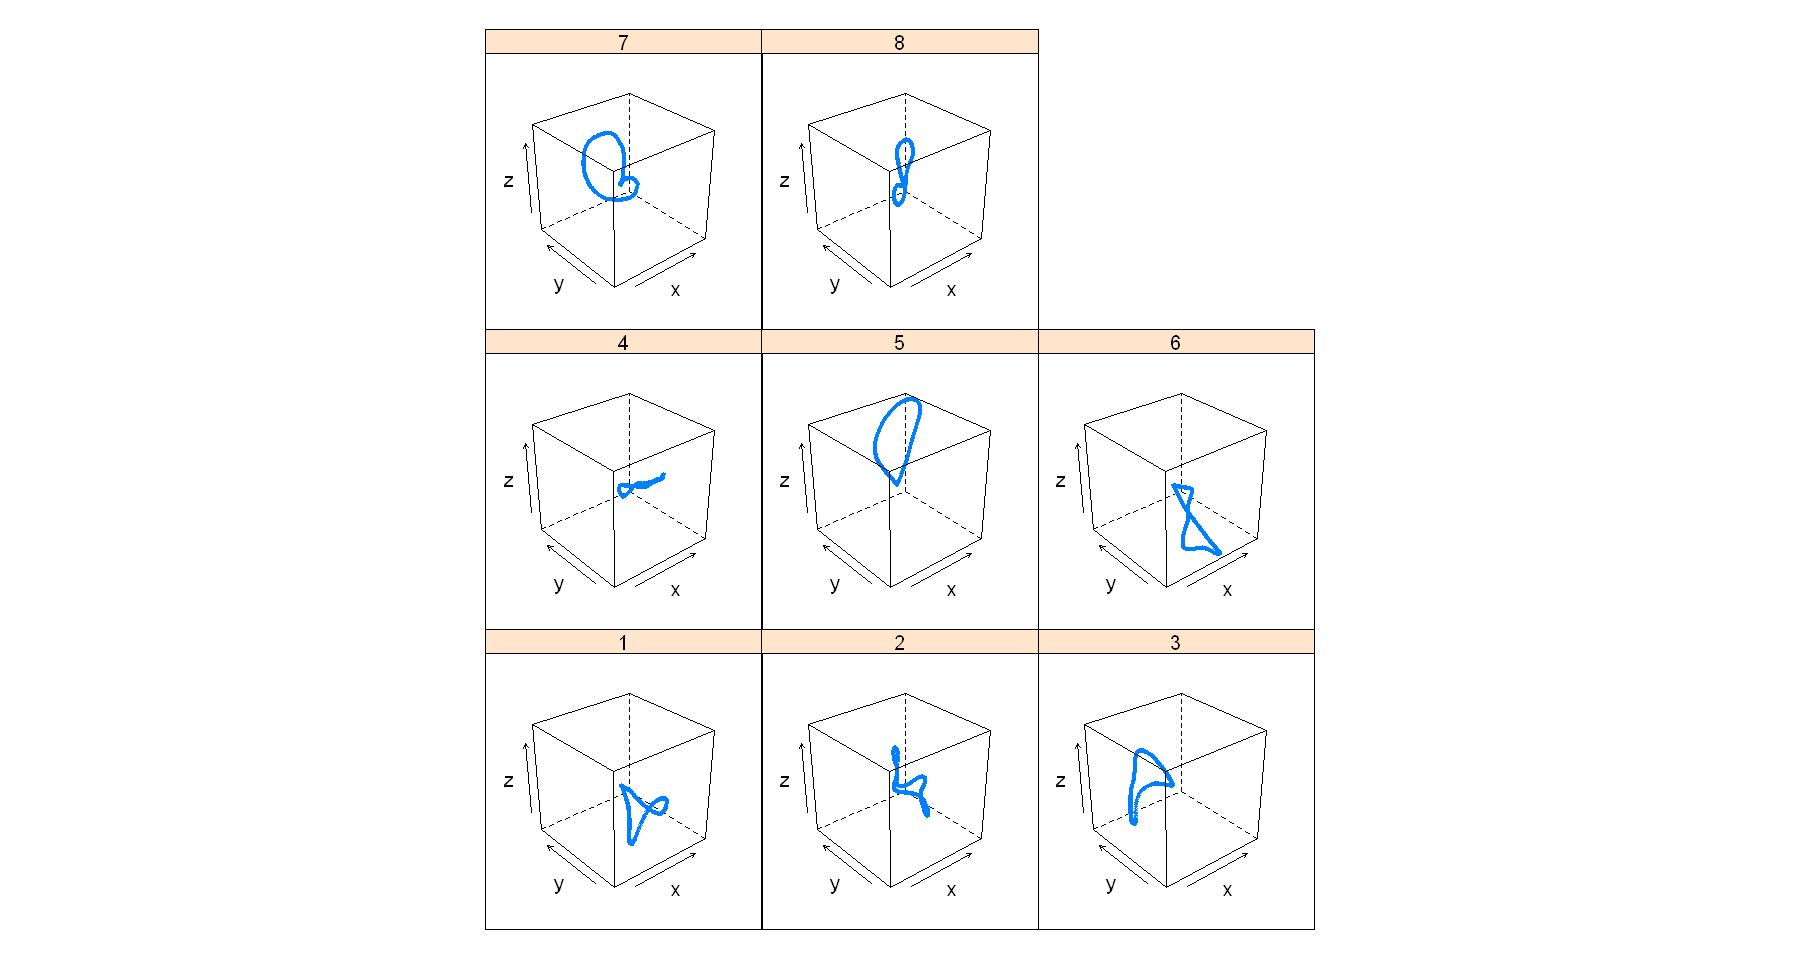

In [89]:
cloud(z_cordinate~x_cordinate*y_cordinate|as.factor(class), data=velocity_samples, xlab="x", ylab="y", zlab="z")

####  b) As you may have noticed, the data is provided as a regular data matrix (i.e. each row represents an instance and columns represent the time index of the observations). 
Assume that X, Y and Z variables
are concatenated to obtain a single time series in an unusual way as follows:
concatenated series = [x1 x2 …. xT y1 y2 …. yT z1 z2 …. zT ]
In other words, the information from X, Y and Z axis are concatenated to obtain a single series of
length 3T (each axis is represented by a time series of length T).
Apply PCA to the time series from each class in the training data. You are expected to filter the data
from each class and apply PCA to the representation. Work on the following questions based on your
PCA application for the time series from each class.